Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output: Number of predicted wins (W)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

# Importing necessery liabraries

In [2]:
# Importing dataset
df = pd.read_csv(r"C:\Users\Abhijeet\Desktop\My Data\Datasets\Baseball_Project\baseball.csv")

In [3]:
df.shape

(30, 17)

Here we have 30 rows and 17 diffrent columns in our datset.

In [4]:
# Printing first 5 rows of datset
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Here first column W is our Label or Target column indicating the wins

* R - Runs scored: number of times a player crosses home plate 

* AB - At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction

* H - Hit: reaching base because of a batted, fair ball without error by the defense
    
* 2B -  Double: hits on which the batter reaches second base safely without the contribution of a fielding error
    
* 3B -  Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
    
* HR - Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
    
* BB - Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base
    
* SO - Strike out - number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base.

* SB -  Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense
    
* RA – Run average: number of runs allowed times nine divided by innings pitched

* ER - number of runs that did not occur as a result of errors or passed balls
    
* ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
    
* CG  – Complete game: number of games where player was the only pitcher for their team
    
* SHO -  Shutout: number of complete games pitched with no runs allowed
    
* SV -  Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

    
* E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

In [5]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
# Checking data Stats

df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


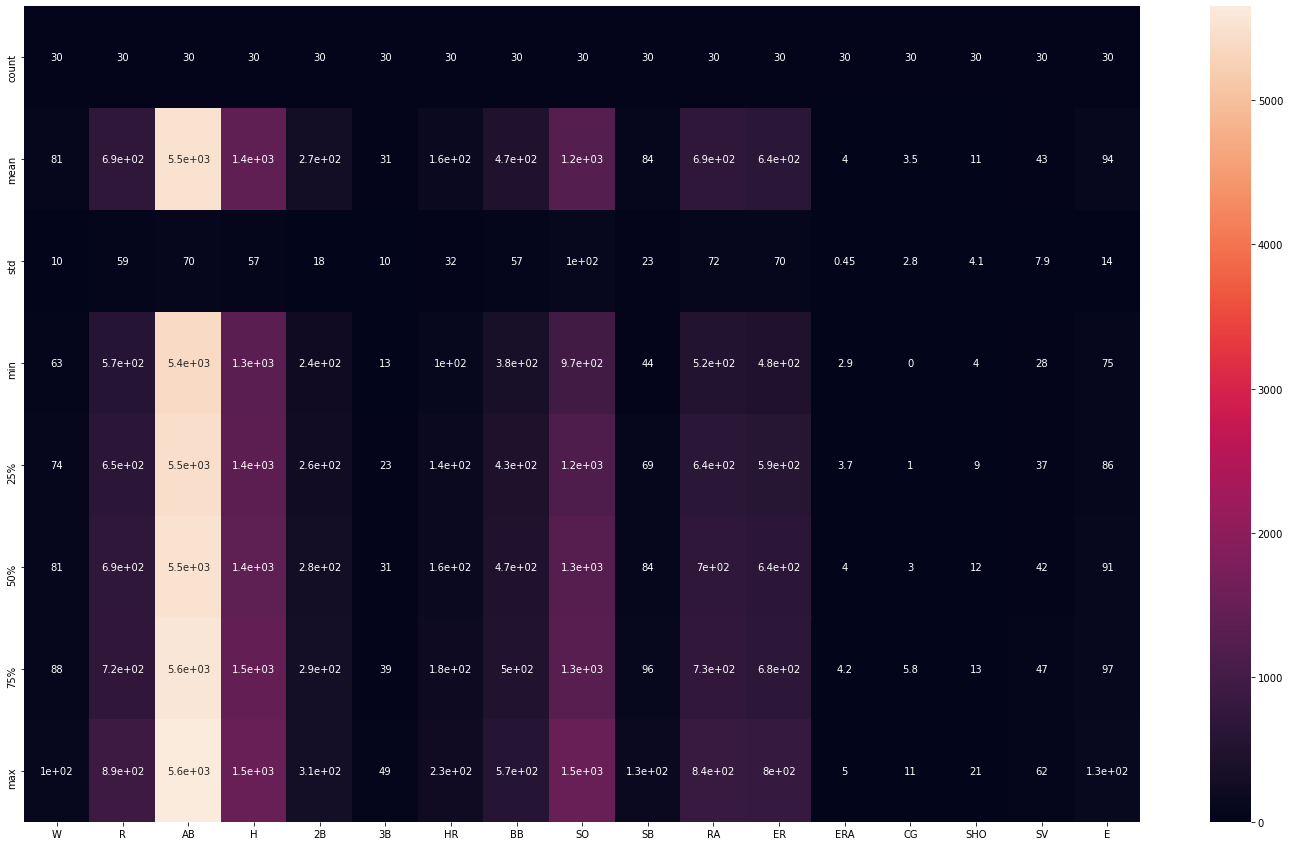

In [7]:
plt.figure(figsize=(25,15))
sns.heatmap(df.describe(), annot = True)
plt.show()

Stasts looks good except for AB column which has higher values , we need to scale our dataset before model feeting

In [8]:
# Checkig for null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [9]:
# Checking for duplicated values
df.duplicated().sum()

0

In [10]:
# Chacking correlation

df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


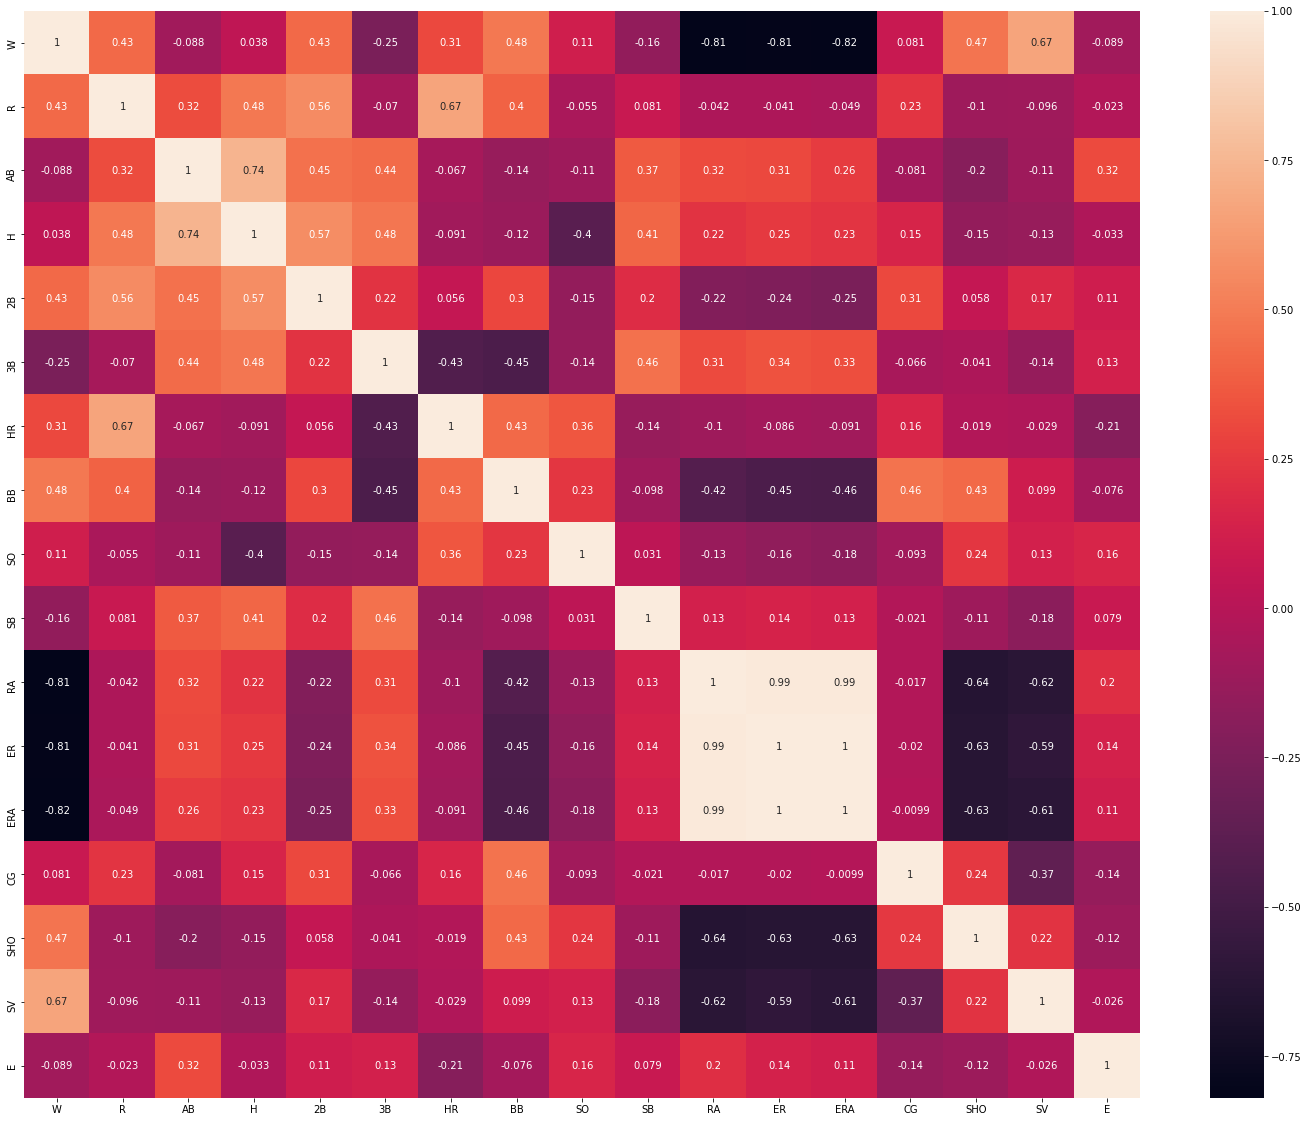

In [11]:
plt.figure(figsize = (25,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

We can see that highest correlation exists between RA / ERA and ER as they are calculated in runs scored

Also all of our correlated columns RA/ERA and ER are having strong negative correlation with the target column

Also Save(Sv) is having strong positive correlation with the target column

In [12]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

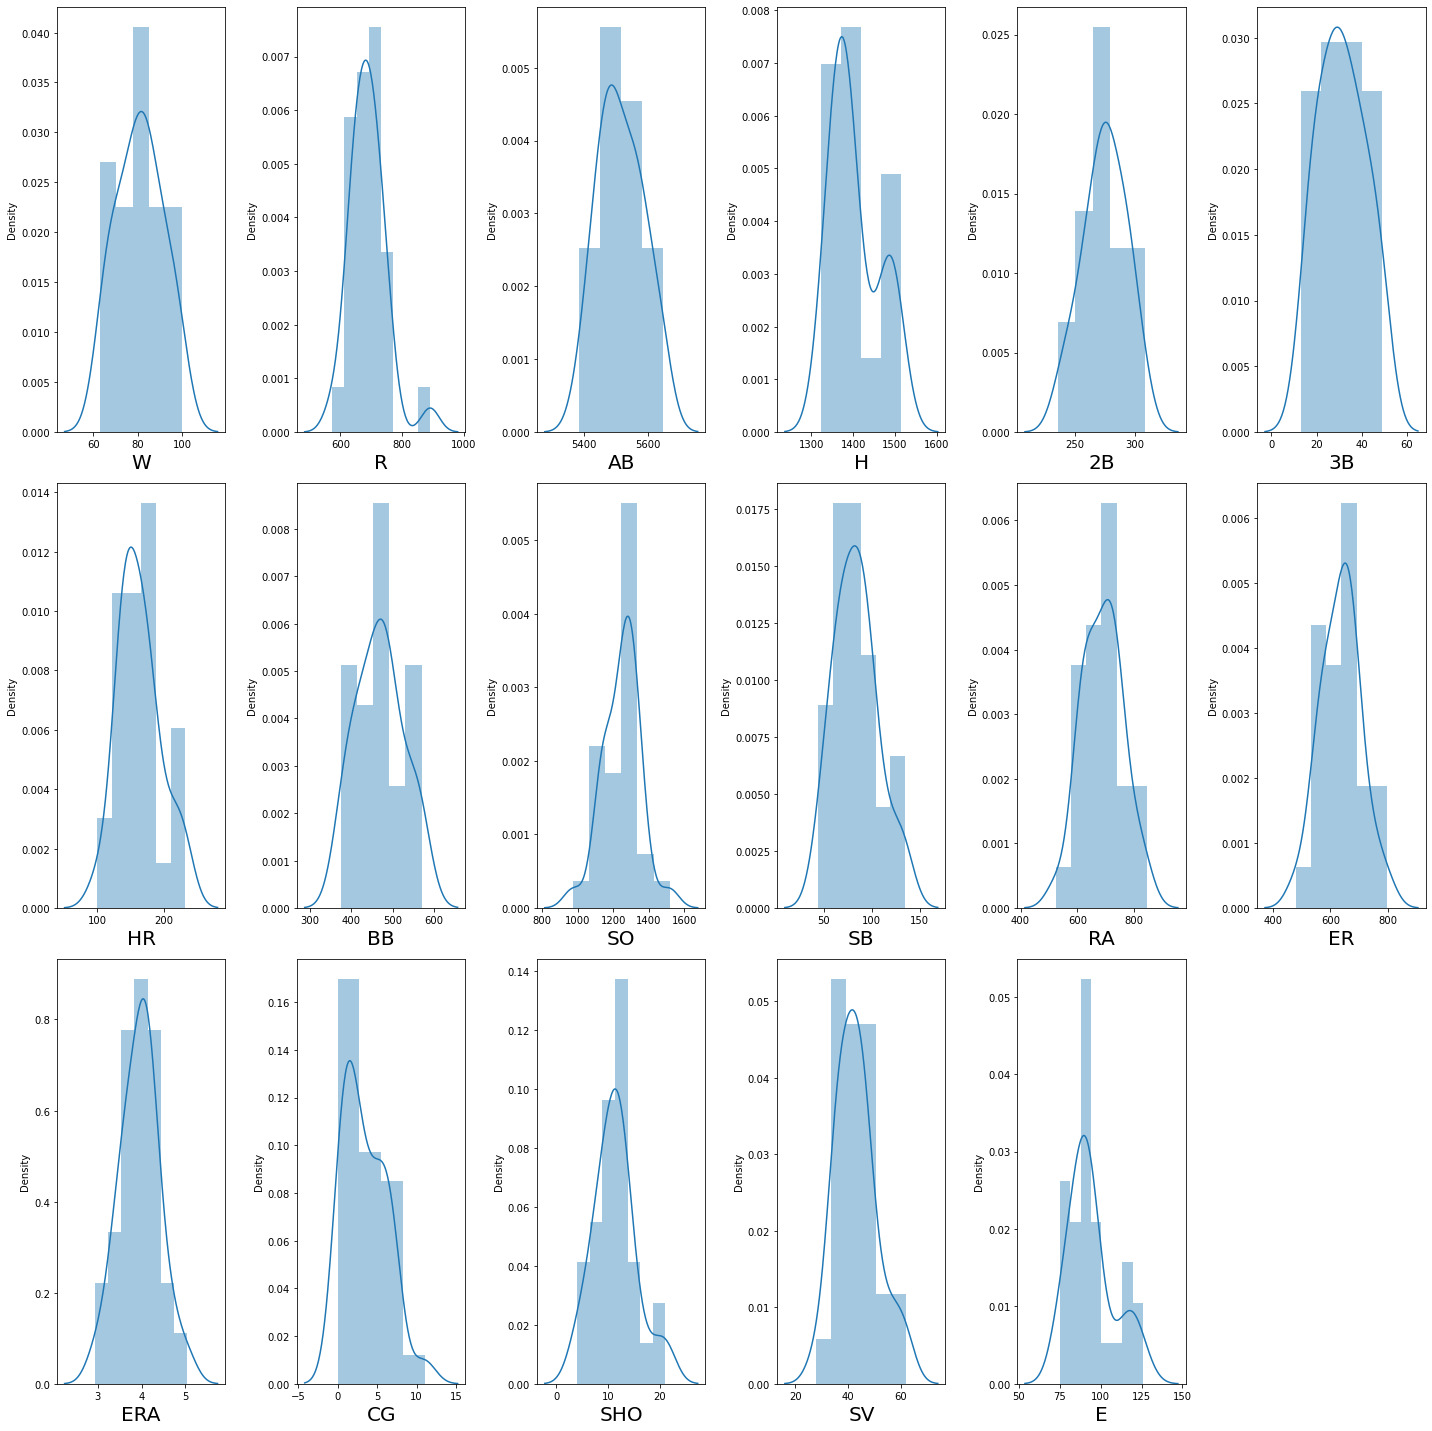

In [19]:
plt.figure(figsize=(20,20), facecolor = 'white')

plotnumber = 1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(3,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.tight_layout()

Distrubution plots for the all columns shows nearely normal distribution except for the R , H , So , SHO and E . This columns have some skewness and may have outliers

In [26]:
r = df['R'].sort_index(ascending = True)

In [28]:
r

0     724
1     696
2     669
3     622
4     689
5     891
6     764
7     713
8     644
9     748
10    751
11    729
12    661
13    656
14    694
15    647
16    697
17    689
18    655
19    640
20    683
21    703
22    613
23    573
24    626
25    667
26    696
27    720
28    650
29    737
Name: R, dtype: int64

In [32]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<AxesSubplot:xlabel='R', ylabel='W'>

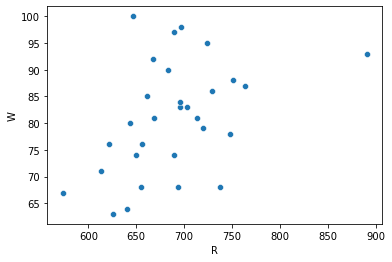

In [45]:
sns.scatterplot(x = 'R', y = 'W', data = df)

we Can see for wins the runs are scattered between 600 to 750

<AxesSubplot:xlabel='RA', ylabel='W'>

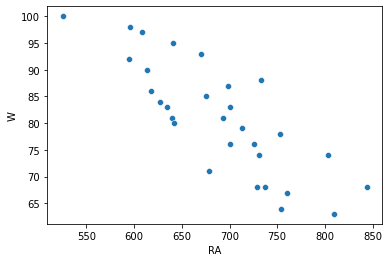

In [44]:
sns.scatterplot(x = 'RA', y = 'W', data = df)

We can say that RA is negatively correlated with the Wins

<AxesSubplot:xlabel='ER', ylabel='W'>

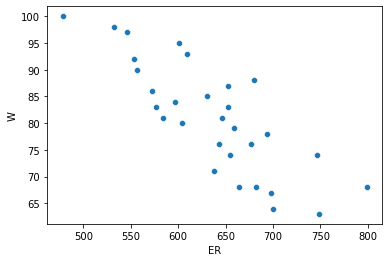

In [46]:
sns.scatterplot(x = 'ER', y = 'W', data = df)

ER is also negatively correlated with the Wins

<AxesSubplot:xlabel='ERA', ylabel='W'>

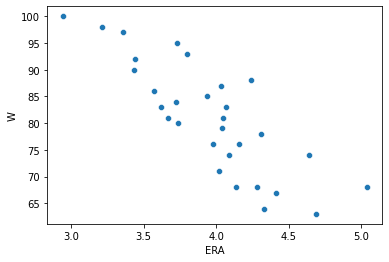

In [47]:
sns.scatterplot(x = 'ERA', y = 'W', data = df)

ER is also negatively correlated with the Wins

<AxesSubplot:xlabel='E', ylabel='W'>

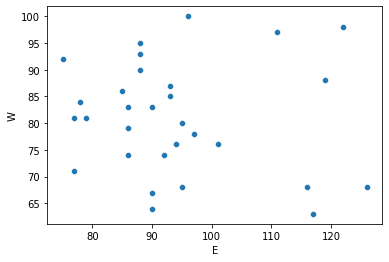

In [51]:
sns.scatterplot(x = 'E', y = 'W', data = df)

array([<AxesSubplot:title={'center':'W'}>,
       <AxesSubplot:title={'center':'R'}>,
       <AxesSubplot:title={'center':'AB'}>,
       <AxesSubplot:title={'center':'H'}>,
       <AxesSubplot:title={'center':'2B'}>,
       <AxesSubplot:title={'center':'3B'}>,
       <AxesSubplot:title={'center':'HR'}>,
       <AxesSubplot:title={'center':'BB'}>,
       <AxesSubplot:title={'center':'SO'}>,
       <AxesSubplot:title={'center':'SB'}>,
       <AxesSubplot:title={'center':'RA'}>,
       <AxesSubplot:title={'center':'ER'}>,
       <AxesSubplot:title={'center':'ERA'}>,
       <AxesSubplot:title={'center':'CG'}>,
       <AxesSubplot:title={'center':'SHO'}>,
       <AxesSubplot:title={'center':'SV'}>,
       <AxesSubplot:title={'center':'E'}>], dtype=object)

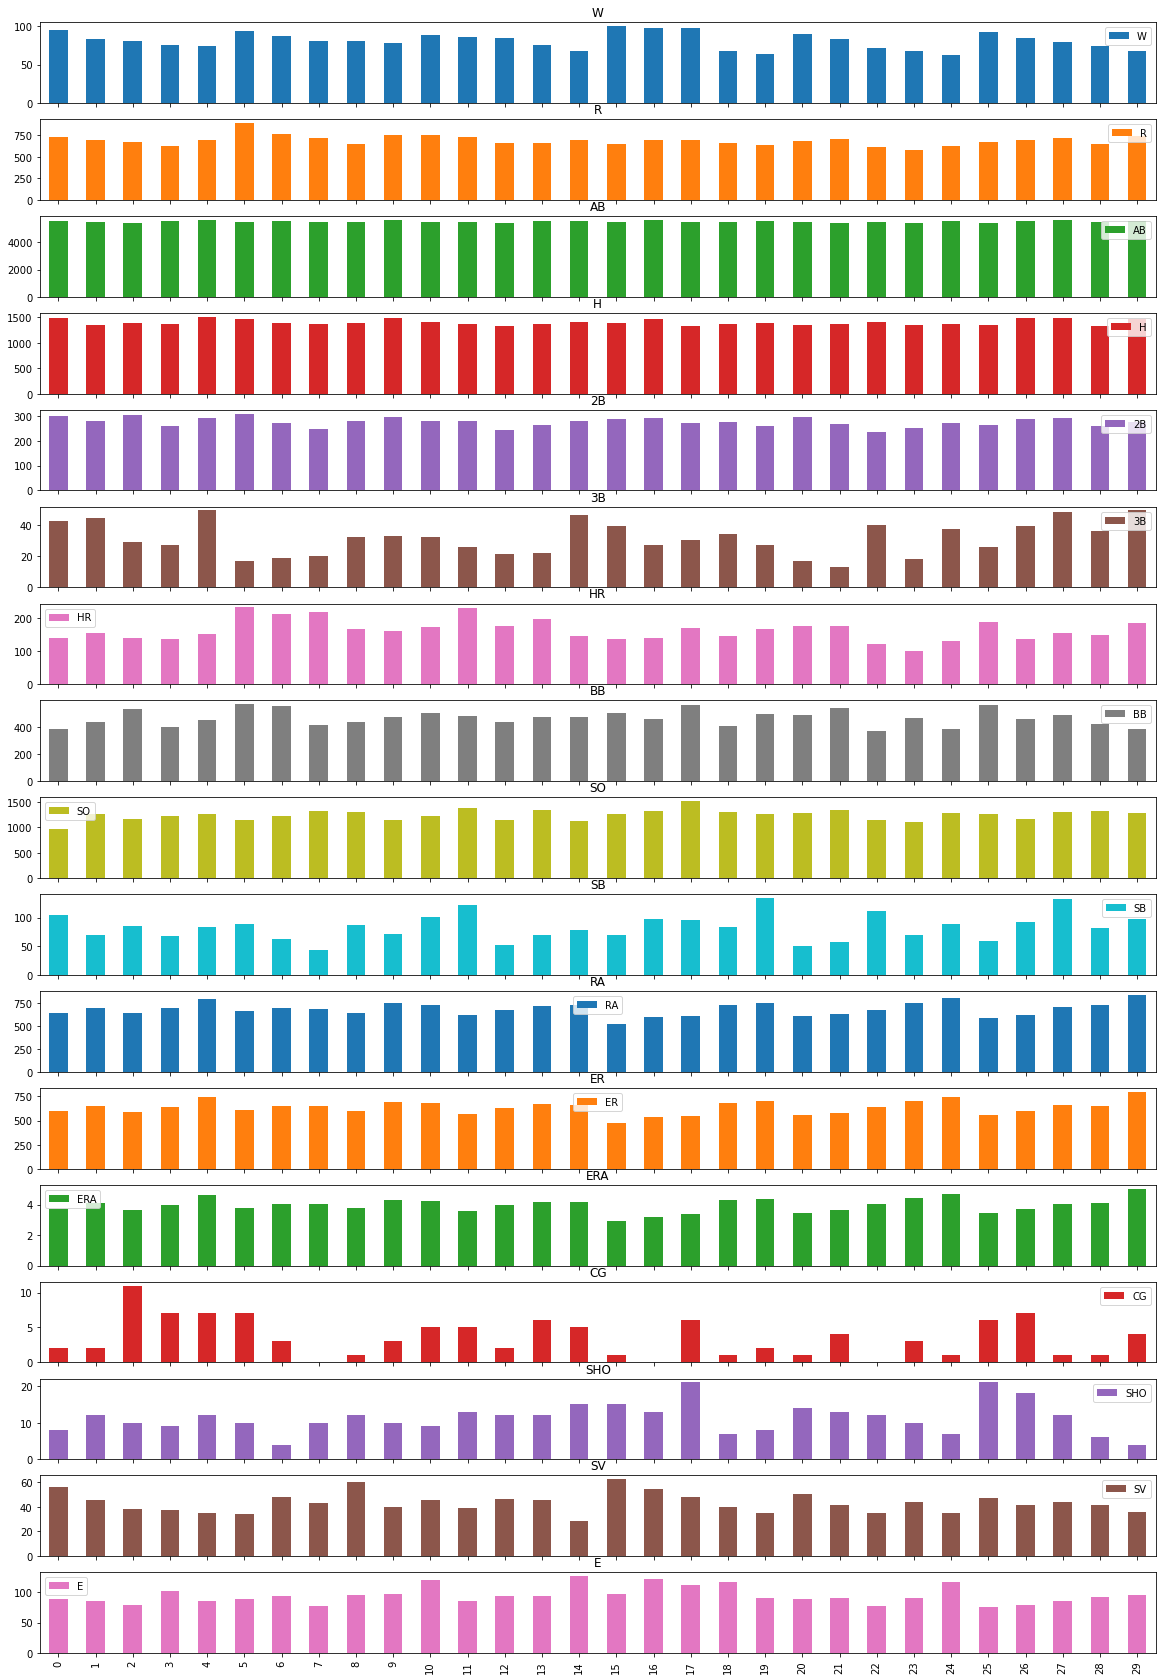

In [53]:
df.plot.bar(subplots= True,stacked= False, figsize=(20,30))

<AxesSubplot:xlabel='W', ylabel='R'>

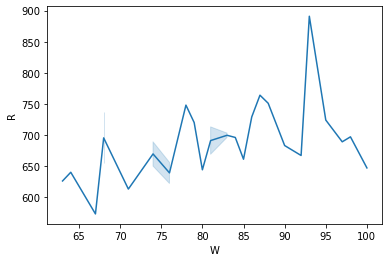

In [54]:
sns.lineplot(x='W',y='R',data=df)

This graph shows that wins increases with increase in the runs




In [65]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Here only one column has skewness so keeping data as it is we will check skewness again later 

In [68]:
col=df.columns

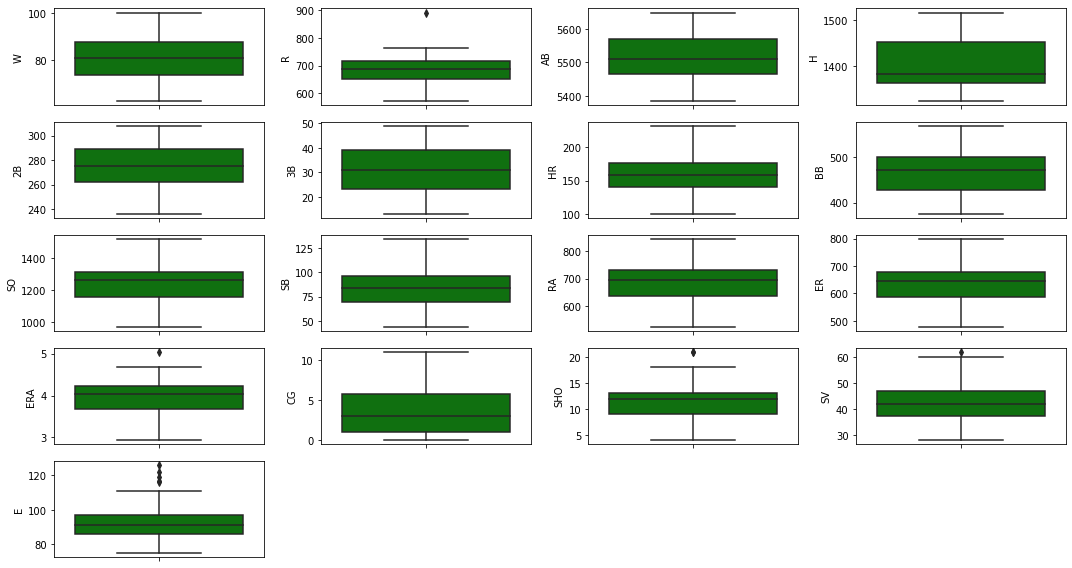

In [69]:
#checking for outliers 
plt.figure(figsize=(15,8))
for i in range(17):
    plt.subplot(5,4,i+1) 
    sns.boxplot(y=df[col[i]],color='g') 
    plt.tight_layout()  

We can see some outliers present in R, SHO , E,ERA

In [70]:
# Using z-squre to remove outliers

In [71]:
df.shape

(30, 17)

In [72]:
from scipy.stats import zscore

z_score = zscore(df[['R','ERA','SHO','E']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)

df= df[filtering_entry]

In [73]:
df.shape

(29, 17)

In [74]:
print ('Data lost = ', ((1)/30)*100 , '%')

Data lost =  3.3333333333333335 %


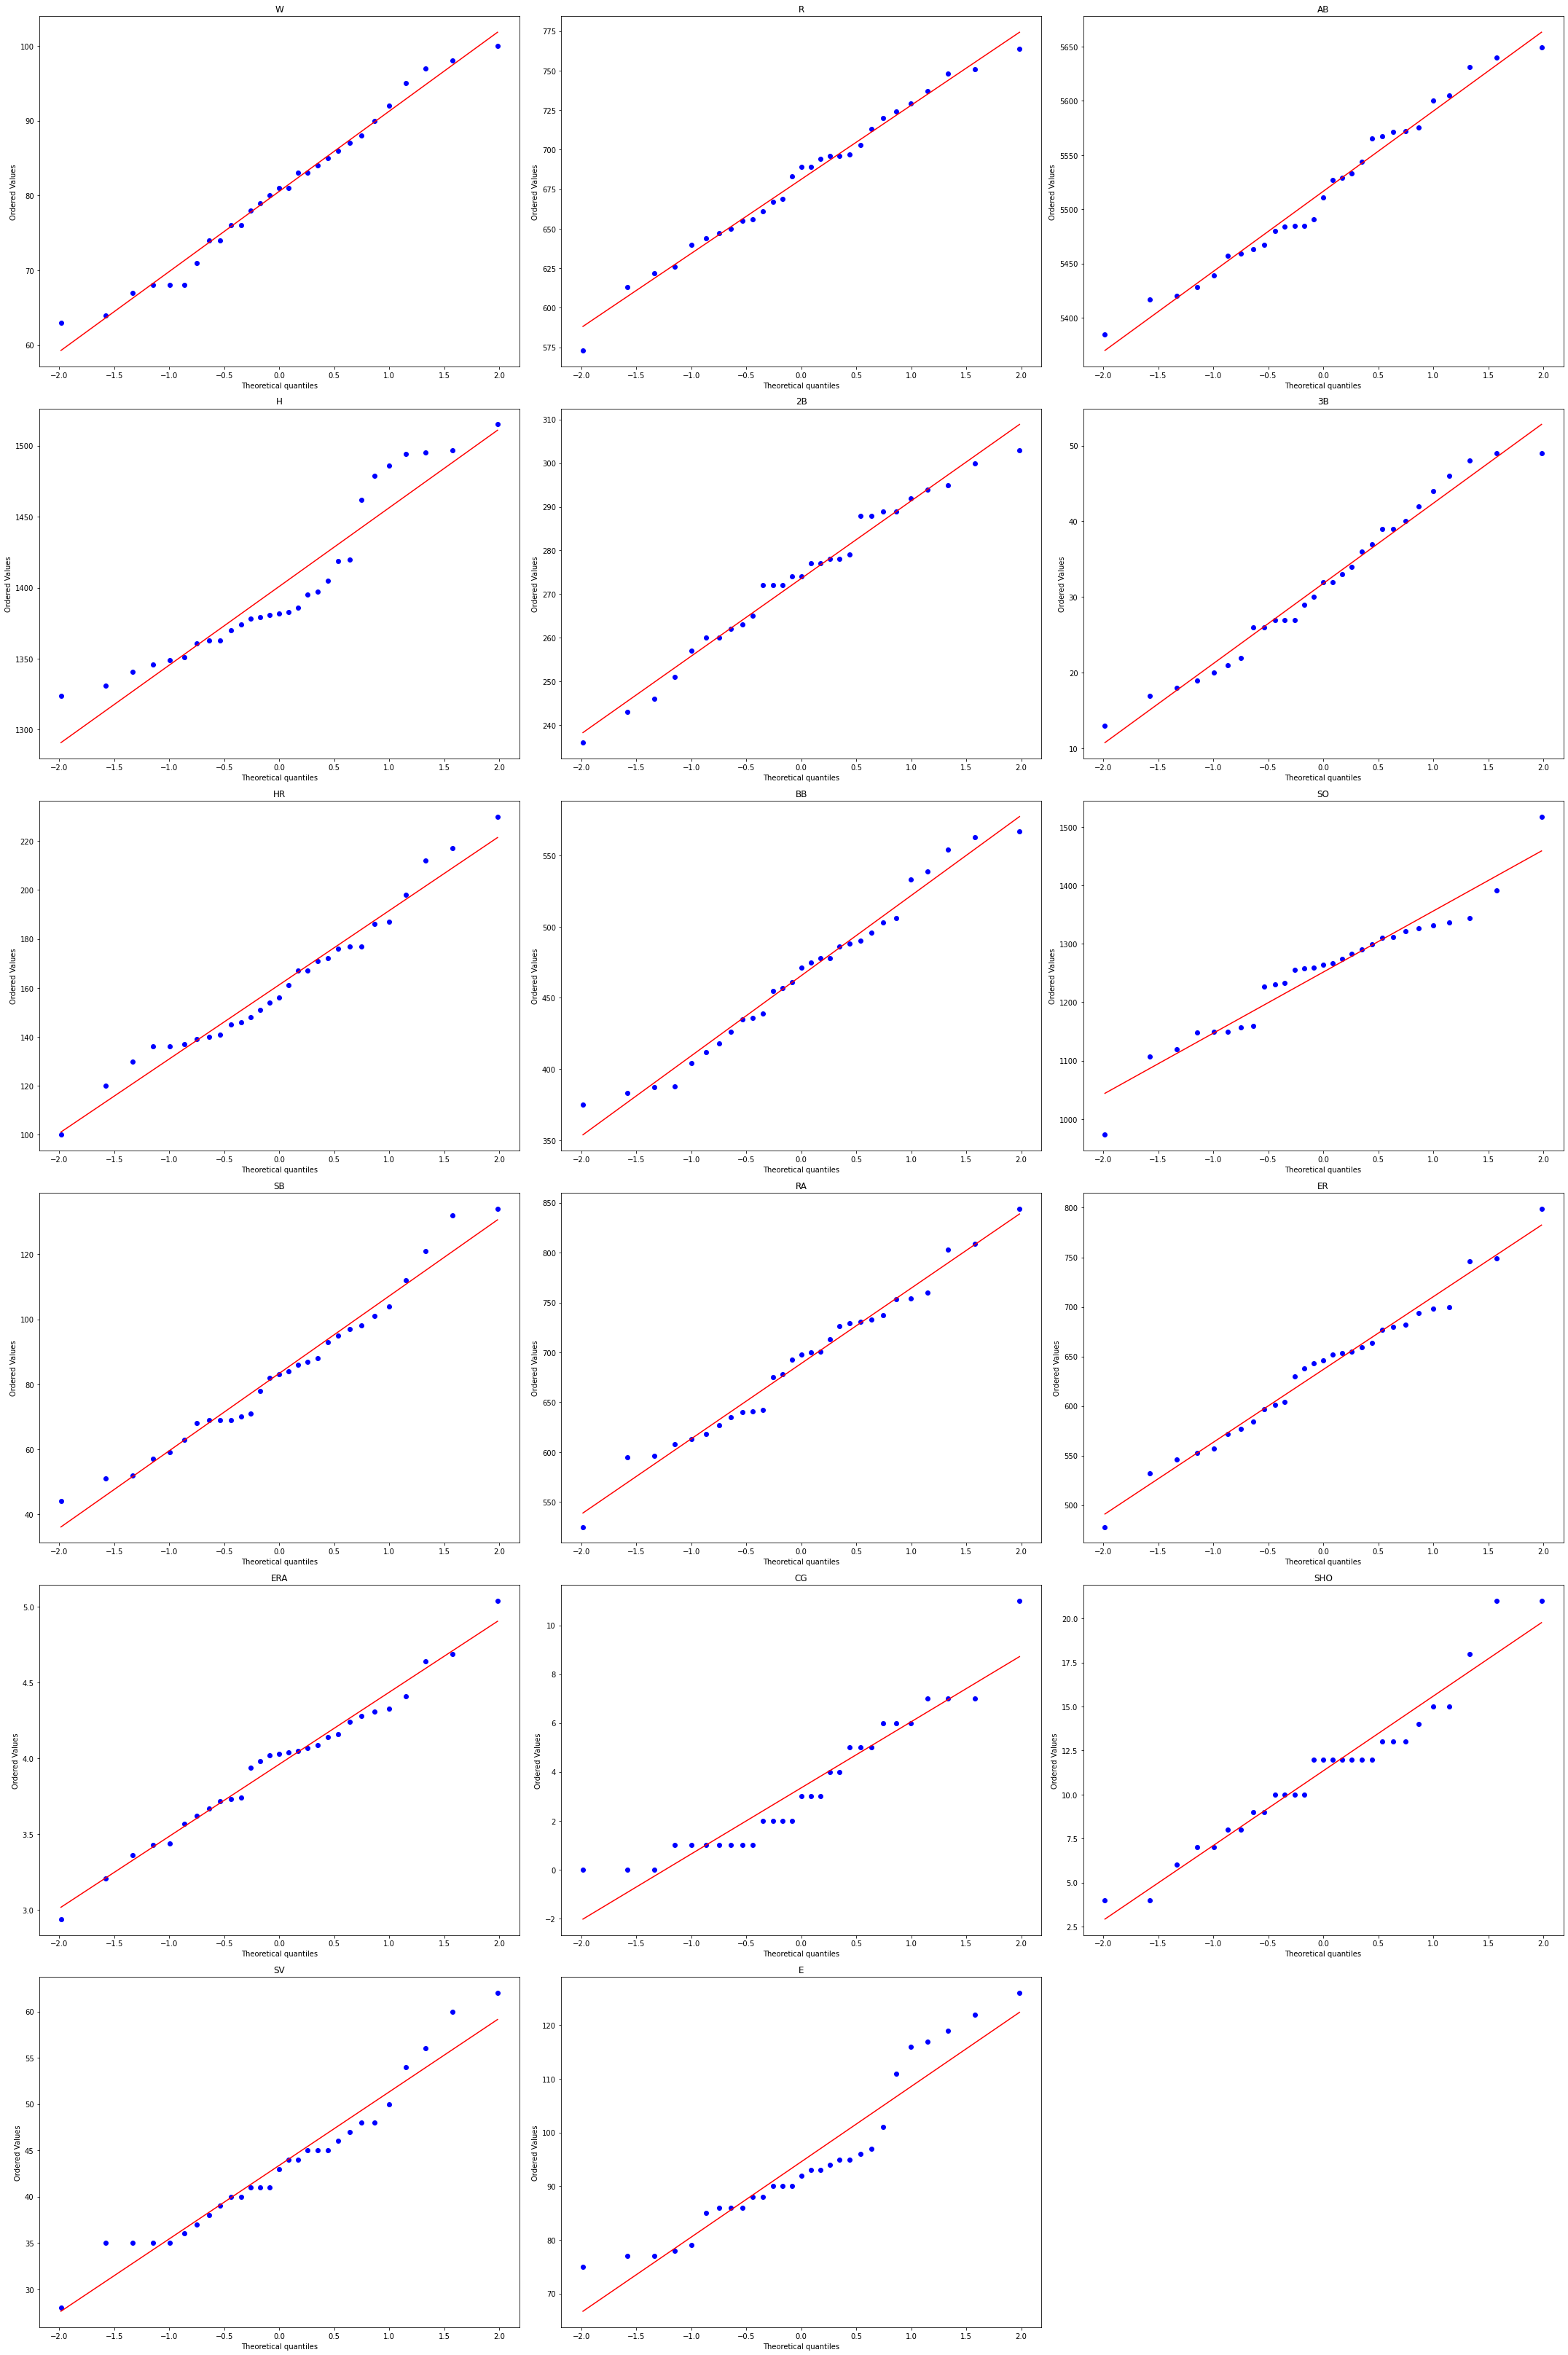

In [75]:
from scipy.stats import probplot
plt.figure(figsize=(30,45))
for i in range(17):
    plt.subplot(6,3,i+1)
    probplot(df[col[i]],plot=plt,dist='norm')
    plt.title(col[i])
    plt.tight_layout()

In [76]:
# Splitting data for as features and target

In [77]:
x = df.drop('W', axis = 1)
y = df['W']

In [78]:
# Importing Regression models 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Checking best random state and r2score

In [82]:
def select_model(model):
    max_score=0
    max_state=0
    for i in range(0,400):
        x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        r2score=r2_score(y_test,predict)
        if r2score>max_score:
            max_score=r2score
            max_state=i
    print("Max score is {} with random state {}".format(max_score,max_state))

In [83]:
# Checking for Linear Regression model
select_model(LinearRegression)

Max score is 0.8402333261792634 with random state 22


In [84]:
select_model(Ridge)

Max score is 0.8801952364143822 with random state 332


In [85]:
select_model(KNeighborsRegressor)

Max score is 0.7302902055622731 with random state 391


In [86]:
select_model(RandomForestRegressor)

Max score is 0.8531340223097114 with random state 181


In [87]:
select_model(AdaBoostRegressor)

Max score is 0.8584659174170772 with random state 280


In [88]:
select_model(DecisionTreeRegressor)

Max score is 0.8079280751941152 with random state 203


Our Ridge model is performing better than the rest

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=332)

In [91]:
r=Ridge()
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print('Mean Squred Error ',mean_squared_error(y_test,y_pred))
print('Root mean squred ',mean_squared_error(y_test,y_pred,squared=False))
print('mean absolute error ',mean_absolute_error(y_test,y_pred))
print('r2 score ',r2_score(y_test,y_pred))

Mean Squred Error  20.137982711106496
Root mean squred  4.4875363743491254
mean absolute error  4.11127876407393
r2 score  0.8801952364143822


In [92]:
MSE=cross_val_score(r,x,y,scoring='neg_mean_squared_error',cv=7)
print(MSE)
print('cross_val_score =  ',MSE.mean())

[ -21.89851533  -42.83769838  -14.61186606 -113.74418088  -31.94899763
  -14.90345953  -17.0562408 ]
cross_val_score =   -36.7144226591185


Hyper Parameter Tunning

In [93]:
from sklearn.model_selection import GridSearchCV

In [99]:
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500,800,950]}


In [100]:
Grid_search =  GridSearchCV(r, param_grid=ridge_params)

In [101]:
Grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [200, 230, 250, 265, 270, 275, 290, 300, 500,
                                   800, 950]})

In [102]:
print(Grid_search.best_params_)

{'alpha': 950}


In [104]:
grid_predictions =Grid_search.predict(x_test)

In [105]:
grid_predictions

print('Mean Squred Error ',mean_squared_error(y_test,grid_predictions))
print('Root mean squred ',mean_squared_error(y_test,grid_predictions,squared=False))
print('mean absolute error ',mean_absolute_error(y_test,grid_predictions))
print('r2 score ',r2_score(y_test,grid_predictions))

Mean Squred Error  48.29488371501675
Root mean squred  6.949452044227426
mean absolute error  5.718379374728997
r2 score  0.7126843731630867


Even though Hyper Parameter tunning we didnt get best results so saving old non-tunned model

In [106]:
# saving the model
import joblib 
joblib.dump(r,'baseball.pkl')

['baseball.pkl']